# DECaLS and SDSS/BOSS Large Scale Structure
by Stephanie Juneau and the NOAO Data Lab Tea

This short notebook illustrates an example joint query between the DECaLS DR3 photometry Tractor table, and the SDSS/BOSS DR13 specObj spectroscopy table. It takes advantage of the fact that there is a version of the DECaLS DR3 tractor table that was pre-matched to SDSS/BOSS DR13 so we can now join on a common column.

The columns from the DECaLS table used (Tractor, pre-matched to specObj DR13) can be seen here: http://datalab.noao.edu/tutdev/query.php?name=ls_dr3.dr3_specobj_dr13

The columns from the SDSS/BOSS DR13 table can be seen here: http://datalab.noao.edu/tutdev/query.php?name=sdss_dr13.specobj


## Import
Import packages including some Data Lab (dl) specific ones.

In [40]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from dl import helpers

## Authenticate

In [41]:
Q = helpers.Querist('anonymous')
print 'Done getting token'

Done getting token


## Joint Query on SDSS specObj and DECaLS Photometry

In this section, we use a version of the DECaLS DR3 tractor table which was pre-matched with specObj table from SDSS/BOSS DR13.

In [55]:
# ls_dr3.dr3_specobj_dr13           #DECaLS matched to SDSS
# ls_dr3.tractor                    #DECaLS tractor catalog (all)
# sdss_dr13.specobj                 #SDSS DR13 specobj

# Write query statement (adql)
query = ('SELECT '
         '  L.ra,L.dec,S.z,S.plug_ra,S.plug_dec,S.class, '
         '  S.vdisp,S.vdisp_err '
         'FROM ls_dr3.dr3_specobj_dr13 as L JOIN sdss_dr13.specobj as S '
         'ON L.specObjId = S.specobjid '
         'WHERE L.ra BETWEEN %s and %s and L.dec BETWEEN %s and %s and (L.ra_ivar > 0) '
         'limit 10000') %(126,131,7.,12.)  #small region

print query

SELECT   L.ra,L.dec,S.z,S.plug_ra,S.plug_dec,S.class,   S.vdisp,S.vdisp_err FROM ls_dr3.dr3_specobj_dr13 as L JOIN sdss_dr13.specobj as S ON L.specObjId = S.specobjid WHERE L.ra BETWEEN 126 and 131 and L.dec BETWEEN 7.0 and 12.0 and (L.ra_ivar > 0) limit 10000


In [56]:
%%time
# Call query manager
result = Q(query,outfmt='table',preview=2)
print 'Time'

Returning Astropy Table
RESULT PREVIEW (2 rows)
ra,dec,z,plug_ra,plug_dec,class,vdisp,vdisp_err
126.000079166901,7.03495434515239,0.212844,126.00008,7.0349361,GALAXY,284.431,15.617
126.014938510686,7.00774970052483,0.243859,126.01495,7.0077364,GALAXY,229.54,23.608
Time
CPU times: user 50.1 ms, sys: 7.94 ms, total: 58 ms
Wall time: 343 ms


## Sanity check: RA, Dec positions from both tables

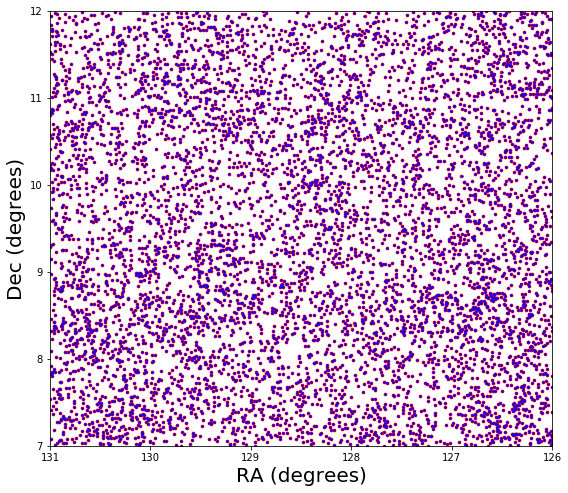

In [58]:
chgsign = np.where(result['ra'] > 180)
result['ra'][chgsign] = result['ra'][chgsign]-360.
result['plug_ra'][chgsign] = result['plug_ra'][chgsign]-360.

plt.figure(figsize=(9,8))

plt.scatter(result['ra'],result['dec'],s=7,color='r',marker='o')
plt.scatter(result['plug_ra'],result['plug_dec'],s=2,color='b')

xmin = 126.
xmax = 131.
ymin = 7.
ymax = 12.


plt.axis([xmin, xmax, ymin, ymax])
plt.xlim(reversed(plt.xlim())) # flip the x-axis
plt.xlabel("RA (degrees)", fontsize=20)
plt.ylabel("Dec (degrees)", fontsize=20)
plt.show()

## Visual Inspection of Large-Scale Structures

Plot the positions of a broad range of redshift, and overplot a thin slice in redshift to show possible structures within that slice.

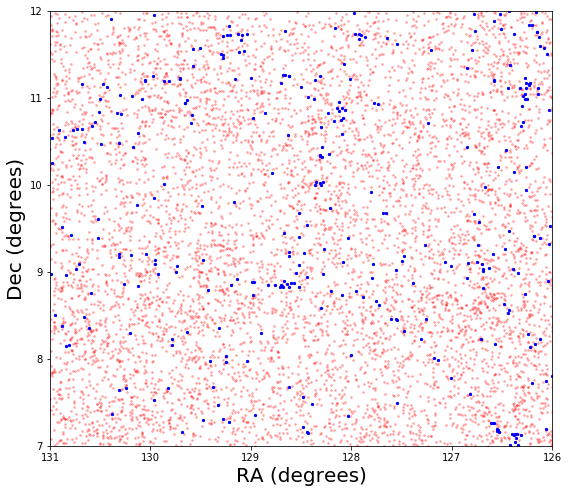

In [60]:
# Select redshift slices
rz = np.where((result['z'] >0.105) & (result['z']<0.125))
rz2 = np.where((result['z'] >0.13) & (result['z']<0.15))

plt.figure(figsize=(9,8))

plt.scatter(result['ra'],result['dec'],s=3,color='r',marker='o',alpha=0.25)
plt.scatter(result['plug_ra'][rz],result['plug_dec'][rz],s=5,color='b')

xmin = 126.
xmax = 131.
ymin = 7.
ymax = 12.

plt.axis([xmin, xmax, ymin, ymax])
plt.xlim(reversed(plt.xlim())) # flip the x-axis
plt.xlabel("RA (degrees)", fontsize=20)
plt.ylabel("Dec (degrees)", fontsize=20)
plt.show()

## Hack Ideas

### 1- Add information about galaxies from specObj

For instance, in the notebook, there is already information about the velocity dispersion (vdisp) of the host galaxies. There is also DECaLS photometry and morphological type (PSF, SIMP, EXP, DEV, COMP).

### 2 - Select interesting structures and retrieve images

Interesting structures can be identified by visual inspection or with automated finders. The Decals-StarGalQso-Helper.ipynb notebook has example code to retrieve image cutouts.